In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import fwd_sample as fs
reload(fs)

<module 'fwd_sample' from 'fwd_sample.pyc'>

# Figure directories

In [2]:
local_dir = 'paper_figures/'
paper_dir = '/home/tmcgrath/Dropbox/Apps/ShareLaTeX/CLAMS to PLoS CB/figures/'

# Import PyMC3 traces

In [3]:
trace = pickle.load(open("PYY_Lep_8hr_trace.p", "rb"))
subj_data = pickle.load(open("PYY_Lep_8hr_subj.p", "rb"))

# Create colourmappers and marker styles

In [4]:
## Create day/night line and marker style
period_ms = {'L':'o', 'D':'^'}
period_ls = {'L':'-', 'D':'--'}

# Group indexing

In [5]:
## Index mask
rat_idx = np.unique(trace['theta1'][0,:], return_index=True)[1]
rat_idx = sorted(rat_idx)

## Subject data
subj_labels = []

for i in subj_data:
    subj_labels.append(i[1].split('_'))
    
subj_labels = np.array(subj_labels)

## Amount colourmapper
amts_save = []
for i, idx in enumerate(rat_idx):
    ## Formatting stuff
    data = subj_labels[i]    
    path = 'all_data/' + '_'.join(data[0:4])
    filename = '_'.join(data)
    amt = helpers.rate_from_file(path, filename)
    amts_save.append(amt)
    
amt_norm = mpl.colors.Normalize(vmin = min(amts_save),
                                vmax = max(amts_save))

cmap = cm.plasma

amt_col = cm.ScalarMappable(norm=amt_norm, cmap=cmap)

# Figure 4a - how well can we predict feeding behaviour into the future? Correlation times

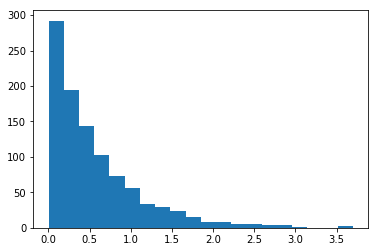

In [6]:
reload(fs)
resamples = 1000

thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']

data = []

for theta in thetas:
    data.append(np.mean(helpers.get_indiv(trace[theta], rat_idx), axis=0))

data = np.array(data).T

amts = []
durs = []

for i in range(resamples):
    x, amount_eaten, num_events, bout_lengths, short_lengths, long_lengths, events = fs.sample_meal(data[0], 0.0)
    amts.append(amount_eaten)
    durs.append(sum(bout_lengths) + sum(short_lengths))

plt.hist(amts, bins=20)
plt.show()

# Figure 4b - how does stomach fullness at meal onset influence meal size?

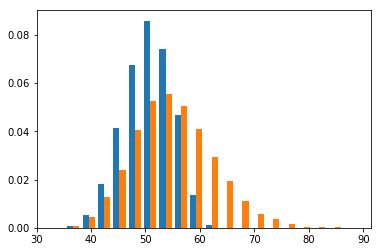

In [60]:
reload(fs)
resamples = 10000
tmax = 60*60*8
xmax = 15.0
x0 = 0.0

thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']

data = []

for theta in thetas:
    data.append(np.mean(helpers.get_indiv(trace[theta], rat_idx), axis=0))

data = np.array(data).T

amts = []
durs = []

amts2 = []

for i in range(resamples):
    #print i
    #print '--- NEW SAMPLE ---'
    x, amount_eaten, num_events, bout_lengths, short_lengths, long_lengths, events = fs.sample_lim_x(tmax, data[100], x0, xmax)
    x, amount_eaten2, num_events, bout_lengths, short_lengths, long_lengths, events = fs.sample_lim_x(tmax, data[100], x0, 100)
    amts.append(3.5*amount_eaten)
    amts2.append(3.5*amount_eaten2)

#plt.hist(amts, bins=20)
plt.hist([amts, amts2], bins=20, normed=True)

plt.show()

# Figure 4c - how do individual behavioural parameters influence response to behavioural perturbations? e.g. cut off feeding at some fullness level

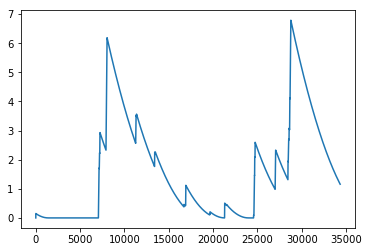

In [48]:
reload(fs)

tmax = 60*60*8

x, amount_eaten, num_events, bout_lengths, short_lengths, long_lengths, events = fs.sample(tmax, data[0], x0)

plt.plot(x)
plt.show()

# Figure 4d - how well can we classify individuals using an SVM trained on parameter datapoints?